In [931]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
%matplotlib inline

In [932]:
ls

Bank_Personal_Loan_Modelling-1.csv  TheraBank_Column_Description.xlsx
Project_Supervised_Learning.ipynb


In [933]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [934]:
loan_df.shape

(5000, 14)

In [935]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [936]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [937]:
#Experince column has min value of -3 which doesn't look right.
loan_df[loan_df['Experience'] < 0]['Experience'].count()

52

In [938]:
loan_df[loan_df['Experience'] < 0]['Income'].describe()

count     52.000000
mean      69.942308
std       37.955295
min       12.000000
25%       40.750000
50%       65.500000
75%       86.750000
max      150.000000
Name: Income, dtype: float64

In [939]:
loan_df[loan_df['Experience'] < 0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

Total 52 entries have 'experience' value less than 0. But their corresponding income is between 12K to 150K USD and they are in their 20s. So instead of changing the experience to 0, it makes more sense to use a positive value

In [940]:
loan_clean_df = loan_df.copy()
loan_clean_df['Experience'] = loan_clean_df['Experience'].abs()
loan_clean_df.loc[loan_clean_df['Experience'] < 0,'Experience']

Series([], Name: Experience, dtype: int64)

In [941]:
loan_df[loan_df['Experience'] < 0]['Experience'].head(10)

89    -1
226   -1
315   -2
451   -2
524   -1
536   -1
540   -1
576   -1
583   -1
597   -2
Name: Experience, dtype: int64

In [942]:
loan_clean_df[loan_clean_df['Experience'] < 0]['Experience'].head(10)

Series([], Name: Experience, dtype: int64)

In [943]:
loan_clean_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Let's look at the distribution of each param**

Text(0,0.5,'Experience')

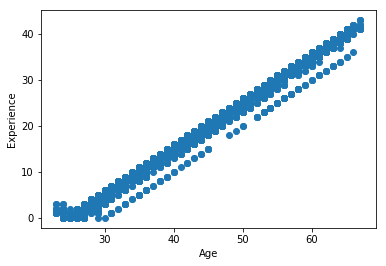

In [944]:
plt.scatter(loan_clean_df['Age'],loan_clean_df['Experience'])
plt.xlabel('Age')
plt.ylabel('Experience')

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

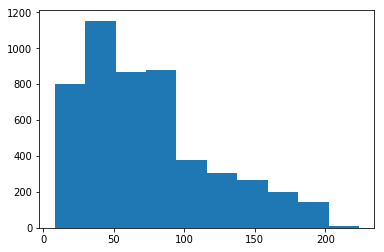

In [945]:
plt.hist(loan_clean_df['Income'])

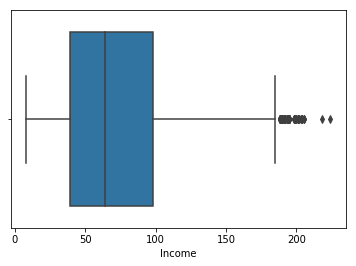

In [946]:
sns.boxplot(loan_clean_df['Income'])

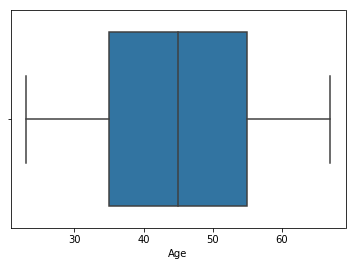

In [947]:
sns.boxplot(loan_clean_df['Age'])

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

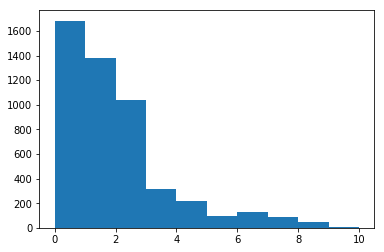

In [948]:
plt.hist(loan_clean_df['CCAvg'])

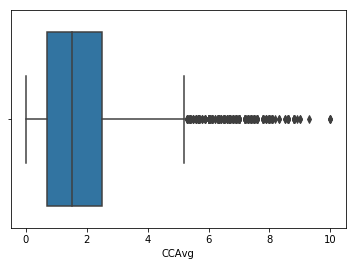

In [949]:
sns.boxplot(loan_clean_df['CCAvg'])

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

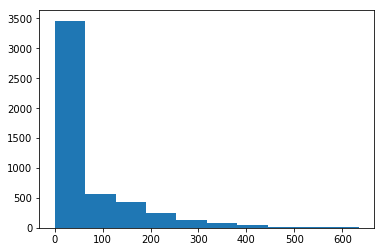

In [950]:
plt.hist(loan_clean_df['Mortgage'])

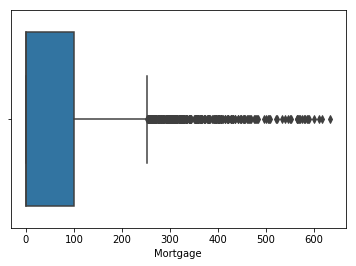

In [951]:
sns.boxplot(loan_clean_df['Mortgage'])

Age column looks normally distributed. Income,CCAvg,Mortgage columns have a few high outliers. Age & Experience have strong correlation as expected.

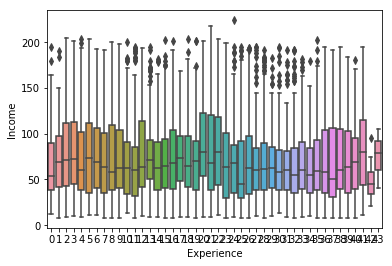

In [952]:
sns.boxplot(x='Experience',y='Income',data=loan_clean_df)

In [953]:
loan_clean_df[loan_clean_df['Experience']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,66.0,2878.272727,1677.198191,106.0,1436.75,3263.50,4376.00,4990.0
Age,66.0,25.636364,1.145377,24.0,25.00,26.00,26.00,30.0
Experience,66.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
Income,66.0,69.651515,46.261961,12.0,38.00,53.50,90.25,195.0
ZIP Code,66.0,93251.136364,1822.507308,90028.0,92044.25,93558.00,94588.50,96094.0
Family,66.0,2.787879,1.102656,1.0,2.00,3.00,4.00,4.0
CCAvg,66.0,1.973939,1.946700,0.1,0.90,1.55,2.00,7.2
Education,66.0,2.181818,0.821052,1.0,1.25,2.00,3.00,3.0
Mortgage,66.0,41.106061,86.726294,0.0,0.00,0.00,0.00,323.0
Personal Loan,66.0,0.106061,0.310275,0.0,0.00,0.00,0.00,1.0


It's interesting to note that people with 0 years of experience have positive income & mortgage. Let's drop these rows because the data might add noise.

In [954]:
loan_clean_df.drop(loan_clean_df[loan_clean_df['Experience']==0].index,inplace=True)
loan_clean_df[loan_clean_df['Experience']==0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


**Check for outliers**

In [955]:
def get_high_outlier_info(df,col):
    q3 = np.percentile(df[col],75)
    q1 = np.percentile(df[col],25)
    iqr = q3 - q1
    high_outlier_threshold = q3 + 1.5*iqr
    num_high_outliers = df[df[col] > high_outlier_threshold][col].count()
    return(high_outlier_threshold,num_high_outliers)

In [956]:
#High outliers for Income
col_investigate = 'Income'
income_outliers_threshold,num_income_outliers = get_high_outlier_info(loan_clean_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_income_outliers,col_investigate,income_outliers_threshold))

There are 95 high outliers in the Income column with the threshold 186.5


In [957]:
#High outliers for CCAvg
col_investigate = 'CCAvg'
ccavg_outliers_threshold,num_ccavg_outliers = get_high_outlier_info(loan_clean_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_ccavg_outliers,col_investigate,ccavg_outliers_threshold))

There are 294 high outliers in the CCAvg column with the threshold 5.45


In [958]:
#High outliers for Mortgage
col_investigate = 'Mortgage'
mortgage_outliers_threshold,num_mortgage_outliers = get_high_outlier_info(loan_clean_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_mortgage_outliers,col_investigate,mortgage_outliers_threshold))

There are 287 high outliers in the Mortgage column with the threshold 252.5


In [959]:
#High outliers for Experience
col_investigate = 'Experience'
experience_outliers_threshold,num_experience_outliers = get_high_outlier_info(loan_clean_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_experience_outliers,col_investigate,experience_outliers_threshold))

There are 0 high outliers in the Experience column with the threshold 58.5


CCAvg,Income,Mortgage columns have a lot of high outliers.. However, it might be interesting to look at if it's worth building a separate model for these outliers. It's possible that there are overlapping scenarios

In [960]:
#Let's see if there are rows with outliers in  income, ccavg & mortgage
c1 = loan_clean_df[loan_clean_df['Mortgage'] > mortgage_outliers_threshold]
c2 = c1[c1['Income'] > income_outliers_threshold]
c3 = c2[c2['CCAvg'] > ccavg_outliers_threshold]
c3
print(c1.shape)
print(c2.shape)
print(c3.shape)
print(loan_clean_df.shape)
print(100*c3.shape[0]/loan_clean_df.shape[0])

(287, 14)
(22, 14)
(8, 14)
(4934, 14)
0.16214025131738954


Since there are only 0.16% of the rows with outliers in all three features, there's probably less value in removing the outliers. Let's see if the model learns to handle individual outliers.

In [961]:
#Drop ID column since it doesn't add any value in building a model.
#Zipcode might be useful in looking at patterns based on zipcode. Let's drop this column and store it in a separate dataframe.
loan_clean_df.drop('ID',axis=1,inplace=True)
loan_clean_noZC_df = loan_clean_df.drop('ZIP Code',axis=1)
loan_clean_noZC_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4934.0,45.601946,11.308495,23.0,36.0,46.0,55.0,67.0
Experience,4934.0,20.403932,11.249596,1.0,11.0,20.0,30.0,43.0
Income,4934.0,73.829347,46.032877,8.0,39.0,64.0,98.0,224.0
Family,4934.0,2.391163,1.147455,1.0,1.0,2.0,3.0,4.0
CCAvg,4934.0,1.937456,1.745057,0.0,0.7,1.5,2.6,10.0
Education,4934.0,1.876976,0.839469,1.0,1.0,2.0,3.0,3.0
Mortgage,4934.0,56.704702,101.891100,0.0,0.0,0.0,101.0,635.0
Personal Loan,4934.0,0.095865,0.294436,0.0,0.0,0.0,0.0,1.0
Securities Account,4934.0,0.104175,0.305519,0.0,0.0,0.0,0.0,1.0
CD Account,4934.0,0.060803,0.238992,0.0,0.0,0.0,0.0,1.0


Since personal loan is the target column, let's move it to the end

In [962]:
cols = loan_clean_noZC_df.columns
cols = list(cols.drop('Personal Loan'))
cols.append('Personal Loan')
loan_clean_noZC_df = loan_clean_noZC_df.reindex(columns=cols)
loan_clean_noZC_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4934.0,45.601946,11.308495,23.0,36.0,46.0,55.0,67.0
Experience,4934.0,20.403932,11.249596,1.0,11.0,20.0,30.0,43.0
Income,4934.0,73.829347,46.032877,8.0,39.0,64.0,98.0,224.0
Family,4934.0,2.391163,1.147455,1.0,1.0,2.0,3.0,4.0
CCAvg,4934.0,1.937456,1.745057,0.0,0.7,1.5,2.6,10.0
Education,4934.0,1.876976,0.839469,1.0,1.0,2.0,3.0,3.0
Mortgage,4934.0,56.704702,101.891100,0.0,0.0,0.0,101.0,635.0
Securities Account,4934.0,0.104175,0.305519,0.0,0.0,0.0,0.0,1.0
CD Account,4934.0,0.060803,0.238992,0.0,0.0,0.0,0.0,1.0
Online,4934.0,0.598500,0.490251,0.0,0.0,1.0,1.0,1.0


The data looks clean to start building the model

In [963]:
#sns.pairplot(loan_clean_noZC_df) 
#commenting out to save execution time.

**Target column distribution**

(array([4461.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         473.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

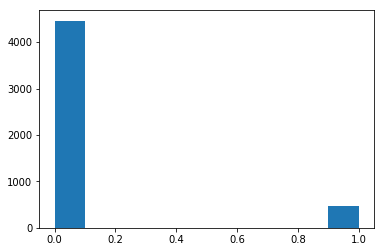

In [964]:
plt.hist(loan_clean_noZC_df['Personal Loan'])

In [965]:
pd.value_counts(loan_clean_noZC_df['Personal Loan'])

0    4461
1     473
Name: Personal Loan, dtype: int64

In [966]:
sucess_rate = pd.value_counts(loan_clean_noZC_df['Personal Loan'])[1]/loan_clean_noZC_df.shape[0]
print('Previous campaign had a success rate of {0:.2f}%'.format(100*sucess_rate))

Previous campaign had a success rate of 9.59%


Since the target column has binary values and all other input columns have numeric values, no further scaling is required

In [967]:
def optimize_knn(scaledX_train,y_train,scaledX_test,y_test):
    k = range(1,10,1)
    train_accuracy = []
    test_accuracy = []
    for n in k:
        knn=KNeighborsClassifier(n_neighbors=n)
        knn.fit(scaledX_train,np.ravel(y_train))
        train_accuracy.append(knn.score(scaledX_train,y_train))
        test_accuracy.append(knn.score(scaledX_test,y_test))
    ind = test_accuracy.index(max(test_accuracy))
    print("the best K value is {}".format(ind+1))  
    print("Test Accuracy: {0:.3f}".format(test_accuracy[ind]))
    print("Train Accuracy: {0:.3f}".format(train_accuracy[ind]))
    return(ind+1)

In [968]:
def run_model(model,X_train, X_test, y_train, y_test,model_name):
    print('Printing results for {} model:'.format(model_name))
    model.fit(X_train, np.ravel(y_train))
    y_predict = model.predict(X_test)
    model_score = model.score(X_test, y_test)
    model_score_f1 = f1_score(y_test,y_predict)
    accuracy = accuracy_score(y_test,y_predict)    
    print('model score: {0:.3f}'.format(model_score))
    print('f1 score: {0:.3f}'.format(model_score_f1))
    print('accuracy: {0:.3f}'.format(accuracy))
    print(metrics.classification_report(y_test, y_predict))
    print(metrics.confusion_matrix(y_test, y_predict))

In [969]:
def run_all_models(df):
    
    X_train, X_test, y_train, y_test = split_data(df)
    
    model = LogisticRegression()
    run_model(model,X_train, X_test, y_train, y_test,'Logistic Regression')

    model = GaussianNB()
    run_model(model,X_train, X_test, y_train, y_test,'Naive Bayes')

    sc=StandardScaler()
    sc.fit(X_train)
    scaledX_train = sc.transform(X_train)
    scaledX_test = sc.transform(X_test)
    k = optimize_knn(scaledX_train,y_train,scaledX_test,y_test)
    model = KNeighborsClassifier(n_neighbors=k)
    run_model(model,scaledX_train, scaledX_test, y_train, y_test,'KNN')

In [970]:
def split_data(df):
    array = df.values
    X = array[:,:-1]
    y = array[:,-1:]
    test_size = 0.30 # taking 70:30 training and test set
    seed = 1  # Random numbmer seeding for reapeatability of the code
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    return (X_train, X_test, y_train, y_test)

In [971]:
run_all_models(loan_clean_noZC_df)

Printing results for Logistic Regression model:
model score: 0.947
f1 score: 0.693
accuracy: 0.947
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      1338
        1.0       0.79      0.62      0.69       143

avg / total       0.94      0.95      0.94      1481

[[1315   23]
 [  55   88]]
Printing results for Naive Bayes model:
model score: 0.875
f1 score: 0.467
accuracy: 0.875
             precision    recall  f1-score   support

        0.0       0.95      0.91      0.93      1338
        1.0       0.40      0.57      0.47       143

avg / total       0.90      0.88      0.88      1481

[[1215  123]
 [  62   81]]
the best K value is 3
Test Accuracy: 0.956
Train Accuracy: 0.976
Printing results for KNN model:
model score: 0.956
f1 score: 0.741
accuracy: 0.956
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98      1338
        1.0       0.86      0.65      0.74       143

avg / total      

From the above results, Logistic regression is better than Naive Bayes as we would expect. 

Logistic Regression finds the posterior probability of the output given the sample whereas Naive Bayes first finds the probability of the sample given the output and then uses that probability to predict the output given the sample. Both Logistic Regression and Naive Bayes assume that all features are independent of each other. However, logistic regression does a better job than Naive Bayes even if the assumptions are violated in the real world scenarios.

Logistic Regression and KNN have fairly comparable results.



In [972]:
#Let's see if dropping the outliers from CCAvg, Income, Mortgage etc have any impact on the results.
#High outliers for Income
col_investigate = 'Income'
income_outliers_threshold,num_income_outliers = get_high_outlier_info(loan_clean_noZC_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_income_outliers,col_investigate,income_outliers_threshold))

There are 95 high outliers in the Income column with the threshold 186.5


In [973]:
loan_clean_noZC_cleanIncome_df = loan_clean_noZC_df[loan_clean_noZC_df['Income'] < income_outliers_threshold]
run_all_models(loan_clean_noZC_cleanIncome_df)

Printing results for Logistic Regression model:
model score: 0.956
f1 score: 0.712
accuracy: 0.956
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98      1319
        1.0       0.89      0.59      0.71       133

avg / total       0.95      0.96      0.95      1452

[[1309   10]
 [  54   79]]
Printing results for Naive Bayes model:
model score: 0.886
f1 score: 0.468
accuracy: 0.886
             precision    recall  f1-score   support

        0.0       0.95      0.92      0.94      1319
        1.0       0.41      0.55      0.47       133

avg / total       0.90      0.89      0.89      1452

[[1213  106]
 [  60   73]]
the best K value is 3
Test Accuracy: 0.959
Train Accuracy: 0.979
Printing results for KNN model:
model score: 0.959
f1 score: 0.726
accuracy: 0.959
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      1319
        1.0       0.95      0.59      0.73       133

avg / total      

Dropping the income outliers helped all 3 models a little bit

In [974]:
loan_clean_noZC_cleanIncome_df.shape

(4839, 12)

In [975]:
#High outliers for Mortgage
col_investigate = 'Mortgage'
mortgage_outliers_threshold,num_mortgage_outliers = get_high_outlier_info(loan_clean_noZC_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_mortgage_outliers,col_investigate,mortgage_outliers_threshold))

There are 287 high outliers in the Mortgage column with the threshold 252.5


In [976]:
#High outliers for CCAvg
col_investigate = 'CCAvg'
ccavg_outliers_threshold,num_ccavg_outliers = get_high_outlier_info(loan_clean_noZC_df,col_investigate)
print('There are {} high outliers in the {} column with the threshold {}'.format(num_ccavg_outliers,col_investigate,ccavg_outliers_threshold))

There are 294 high outliers in the CCAvg column with the threshold 5.45


In [977]:
loan_clean_noZC_cleanCCAvg_df = loan_clean_noZC_df[loan_clean_noZC_df['CCAvg'] < ccavg_outliers_threshold]
run_all_models(loan_clean_noZC_cleanCCAvg_df)

Printing results for Logistic Regression model:
model score: 0.958
f1 score: 0.716
accuracy: 0.958
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      1276
        1.0       0.83      0.63      0.72       116

avg / total       0.96      0.96      0.96      1392

[[1261   15]
 [  43   73]]
Printing results for Naive Bayes model:
model score: 0.909
f1 score: 0.533
accuracy: 0.909
             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95      1276
        1.0       0.47      0.62      0.53       116

avg / total       0.92      0.91      0.92      1392

[[1194   82]
 [  44   72]]
the best K value is 1
Test Accuracy: 0.959
Train Accuracy: 1.000
Printing results for KNN model:
model score: 0.959
f1 score: 0.711
accuracy: 0.959
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98      1276
        1.0       0.86      0.60      0.71       116

avg / total      

Removing CCAvg outliers has helped Naive Bayes more than other 2 models

In [978]:
loan_clean_noZC_cleanMortgage_df = loan_clean_noZC_df[loan_clean_noZC_df['Mortgage'] < mortgage_outliers_threshold]
run_all_models(loan_clean_noZC_cleanMortgage_df)

Printing results for Logistic Regression model:
model score: 0.961
f1 score: 0.718
accuracy: 0.961
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      1280
        1.0       0.88      0.61      0.72       115

avg / total       0.96      0.96      0.96      1395

[[1270   10]
 [  45   70]]
Printing results for Naive Bayes model:
model score: 0.905
f1 score: 0.494
accuracy: 0.905
             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95      1280
        1.0       0.44      0.57      0.49       115

avg / total       0.92      0.90      0.91      1395

[[1197   83]
 [  50   65]]
the best K value is 5
Test Accuracy: 0.968
Train Accuracy: 0.968
Printing results for KNN model:
model score: 0.968
f1 score: 0.771
accuracy: 0.968
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      1280
        1.0       0.96      0.64      0.77       115

avg / total      

Dropping Mortgage outliers has improved all 3 models.

In [979]:
loan_clean_noZC_cleanMortgage_df.shape

(4647, 12)

In [980]:
loan_clean_noZC_df.shape

(4934, 12)

Further scope for exploration:
1. Customers who don't have UniversalBank CC - are they more likely to buy the loan offer?
2. data set can be grouped by various other categorical variables to see if it's worth building separate models for them.